In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df=pd.read_csv(url)

In [5]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
36,2014,AUDI,A8L TDI CLEAN DIESEL,FULL-SIZE,3.0,6,AS8,D,10.1,6.5,8.5,33,230
10,2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225
293,2014,DODGE,AVENGER,MID-SIZE,2.4,4,A4,X,11.2,8.0,9.8,29,225
720,2014,MAZDA,MX-5,TWO-SEATER,2.0,4,M6,Z,11.1,8.4,9.9,29,228
189,2014,CHEVROLET,CAMARO,COMPACT,3.6,6,M6,X,14.2,8.6,11.7,24,269


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
334,1.4,4,7.9,182
934,2.4,4,9.9,228
811,1.6,4,8.0,184
932,2.5,4,9.0,207
694,2.0,4,8.2,189
1018,2.5,5,9.8,225
825,1.2,3,6.4,147
328,2.4,4,11.1,255
382,5.0,8,19.7,315


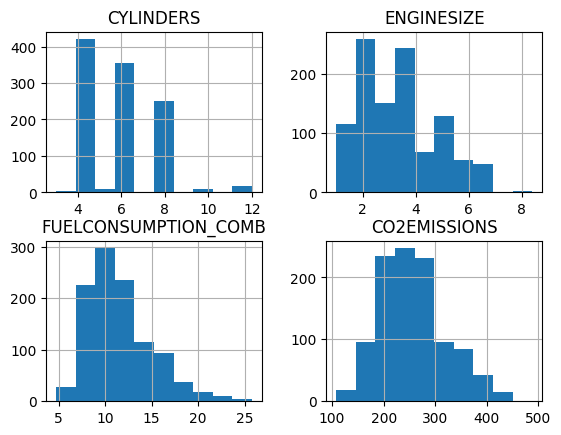

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

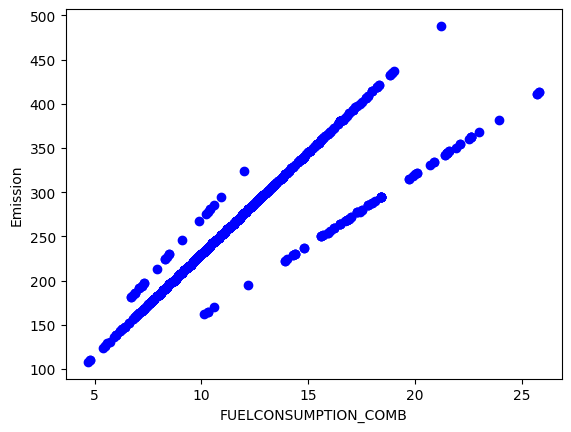

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

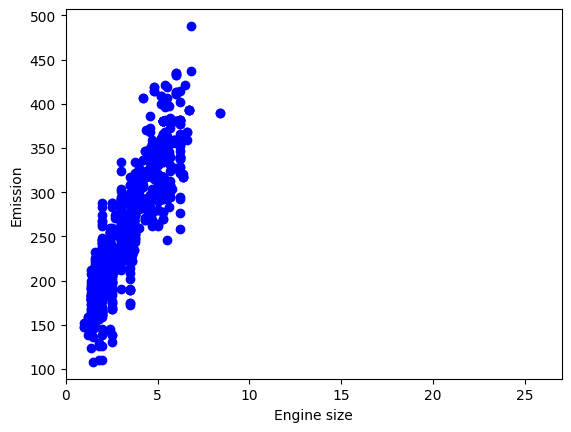

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

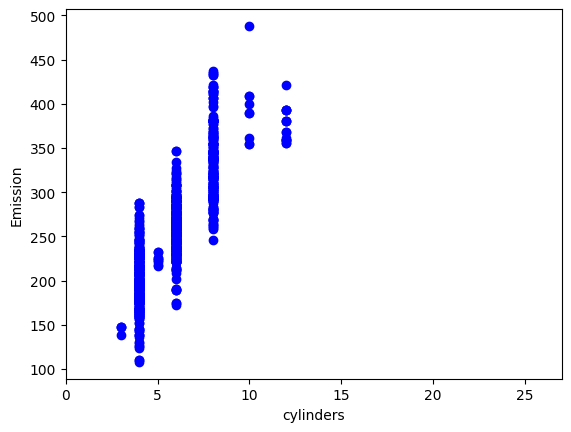

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("cylinders")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

In [12]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

In [15]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


In [16]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


Text(0, 0.5, 'Emission')

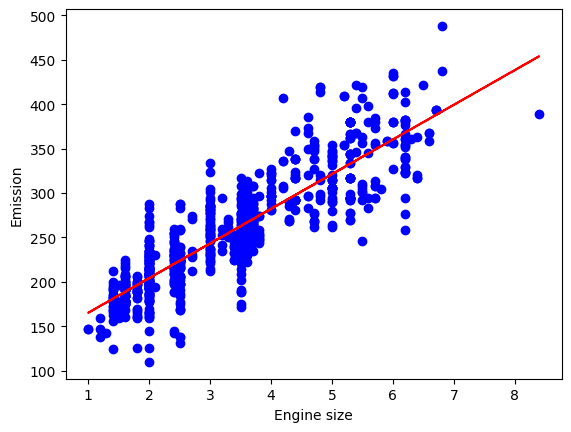

In [17]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


In [19]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_test.reshape(-1, 1), y_test)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  39.58162052639752
Intercept:  121.6409659748904


Text(0, 0.5, 'Emission')

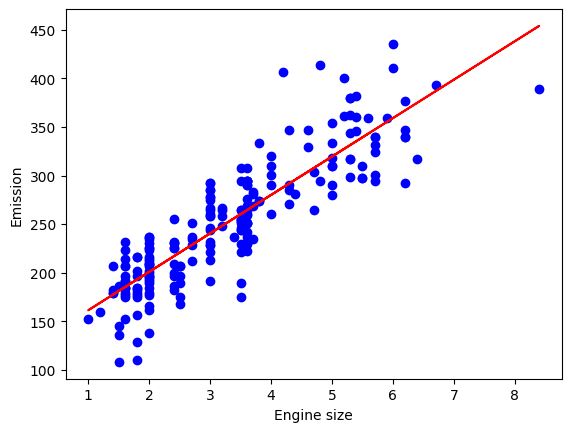

In [20]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [21]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [22]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn 
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  16.180900781199195
Intercept:  69.10302617988444


In [25]:
y_test_ = regressor.predict(X_test.reshape(-1, 1)) 

# Print the coefficients

In [27]:
y_test_ = regressor.predict(X_test.reshape(-1,1))

In [28]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))

Mean squared error: 797.43


In [29]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))

Mean squared error: 797.43
